In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [44]:
# Membaca data dari file Excel
df = pd.read_excel('new.xlsx')
df

,Tanggal,KursAUD,KursMYR,KursEURO
0,2023-01-02,10625.80,3560.55,16694.78
1,2023-01-03,10651.29,3556.79,16717.18
2,2023-01-04,10632.27,3562.52,16651.90
3,2023-01-05,10735.64,3568.23,16626.82
4,2023-01-06,10689.84,3568.71,16646.59
...,...,...,...,...
109,2023-06-21,10291.94,3261.10,16542.07
110,2023-06-22,10190.52,3242.93,16431.61
111,2023-06-23,10185.97,3224.91,16488.85
112,2023-06-26,10094.38,3225.55,16390.37


In [45]:
# Mengonversi kolom tanggal ke format yang sesuai (opsional)
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%Y-%m-%d')

In [46]:
# Mengubah kolom tanggal menjadi variabel numerik (jumlah hari sejak tanggal awal)
df['Hari'] = (df['Tanggal'] - df['Tanggal'].min()).dt.days
df

,Tanggal,KursAUD,KursMYR,KursEURO,Hari
0,2023-01-02,10625.80,3560.55,16694.78,0
1,2023-01-03,10651.29,3556.79,16717.18,1
2,2023-01-04,10632.27,3562.52,16651.90,2
3,2023-01-05,10735.64,3568.23,16626.82,3
4,2023-01-06,10689.84,3568.71,16646.59,4
...,...,...,...,...,...
109,2023-06-21,10291.94,3261.10,16542.07,170
110,2023-06-22,10190.52,3242.93,16431.61,171
111,2023-06-23,10185.97,3224.91,16488.85,172
112,2023-06-26,10094.38,3225.55,16390.37,175


In [47]:
# Memisahkan variabel independen (Hari) dan dependen (Nilai)
X = df[['Hari']].values
y = df['KursAUD'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MSE: {0:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('R^2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('MAPE: {:.2f}%'.format(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100))

MSE: 50392.397
MAE: 172.725
R^2: 0.429
MAPE: 1.69%


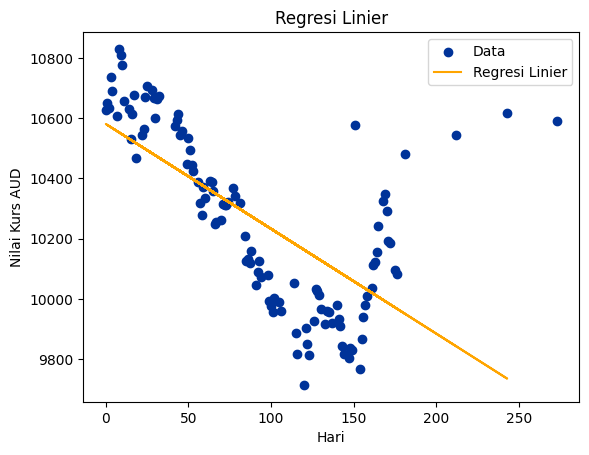

In [55]:
# Menampilkan grafik regresi linier
plt.scatter(X, y, color='#003399', label='Data')
plt.plot(X_train, y_train_pred, color='orange', label='Regresi Linier')
plt.xlabel('Hari')
plt.ylabel('Nilai Kurs AUD')
plt.legend()
plt.title('Regresi Linier')
plt.show()